In [1]:
from shapely.geometry import Point
import pandas as pd
import numpy as np
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
%matplotlib inline

### EDA of the Derecho 911 Calls

In [3]:
phone_calls_derecho_911 = pd.read_csv('../data/911_Phone_Calls_Derecho.csv')
phone_calls_derecho_911.head()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE


In [4]:
phone_calls_derecho_911.tail()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
1544,5/4/2020 0:18,911 Calls,36.131694,-86.770535,1823-C 12TH AV - SECTOR SE S
1545,5/4/2020 0:22,911 Calls,36.042237,-86.743455,5244-C EDMONSON PIKE - SECTOR SE
1546,5/4/2020 0:25,911 Calls,36.077664,-86.655607,2747-B MURFREESBORO PKE - SECTOR NW
1547,5/4/2020 0:29,911 Calls,36.024706,-86.743562,302 SUMMIT VIEW DR - E
1548,5/4/2020 0:29,911 Calls,NaN,NaN,2014 QUAIL HOLLOW CIR


In [5]:
phone_calls_derecho_911.shape

(1549, 5)

In [6]:
phone_calls_derecho_911 = phone_calls_derecho_911.dropna()

In [7]:
phone_calls_derecho_911.shape

(1483, 5)

In [8]:
phone_calls_derecho_911.info

<bound method DataFrame.info of      Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0      5/3/2020 16:30  911 Calls     36.247802     -86.716847   
1      5/3/2020 16:30  911 Calls     36.143108     -86.800621   
2      5/3/2020 16:30  911 Calls     36.100516     -87.056329   
3      5/3/2020 16:30  911 Calls     36.130021     -86.927819   
4      5/3/2020 16:31  911 Calls     36.142380     -86.881882   
...               ...        ...           ...            ...   
1543    5/4/2020 0:16  911 Calls     36.067911     -86.622970   
1544    5/4/2020 0:18  911 Calls     36.131694     -86.770535   
1545    5/4/2020 0:22  911 Calls     36.042237     -86.743455   
1546    5/4/2020 0:25  911 Calls     36.077664     -86.655607   
1547    5/4/2020 0:29  911 Calls     36.024706     -86.743562   

                       Cell Tower Address  
0                         WIRELESS CALLER  
1                     1161 21ST AV S - SE  
2                   8013 C MCCRORY LN - N  
3          

In [9]:
phone_calls_derecho_911.value_counts()

Seizure DateTime  CallTypeId  ALI Latitude  ALI Longitude  Cell Tower Address                
5/3/2020 19:53    911 Calls   36.238640     -86.747276     3526 SLATE DR - SW Sector             2
5/3/2020 17:11    911 Calls   36.125708     -86.847374     4400 HARDING PIKE - E                 2
5/3/2020 20:37    911 Calls   36.154568     -86.764717     18 ACADEMY PL - SE Sector             2
5/3/2020 23:48    911 Calls   36.251976     -86.716034     118 EMMITT AV                         2
5/3/2020 18:22    911 Calls   36.148411     -86.823708     3201C ELKINS AVE - SW                 1
                                                                                                ..
5/3/2020 20:00    911 Calls   36.049168     -86.690798     WIRELESS CALLER                       1
                              36.151339     -86.872737     WIRELESS CALLER                       1
5/3/2020 20:01    911 Calls   36.067387     -86.631485     2747 C MURFREESBORO PKE - E Sector    1
               

In [10]:
phone_calls_tornado_911 = pd.read_csv('../data/911_Phone_Calls_tornado.csv')
phone_calls_tornado_911.head()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector
3,3/3/2020 0:36,911 Calls,NaN,NaN,526 FOUNDRY DR
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N


In [11]:
phone_calls_tornado_911.shape

(475, 5)

In [12]:
phone_calls_tornado_911 = phone_calls_tornado_911.dropna()

In [13]:
phone_calls_tornado_911.shape

(450, 5)

In [14]:
phone_calls_tornado_911.value_counts()

Seizure DateTime  CallTypeId  ALI Latitude  ALI Longitude  Cell Tower Address                 
3/3/2020 0:42     911 Calls   36.167431     -86.796860     907 12TH AV N - N                      2
3/3/2020 4:58     911 Calls   36.276566     -86.799417     4884 LICKTON PIKE - SE                 1
3/3/2020 1:15     911 Calls   36.537846     -85.862511     8101 HEADY RIDGE ROAD - SW SECTOR      1
3/3/2020 1:16     911 Calls   36.173902     -86.738412     254 RIVERSIDE DR - W                   1
                              36.175522     -86.754463     2025B METRO CENTER BLVD. - E SECTOR    1
                                                                                                 ..
3/3/2020 2:08     911 Calls   36.177860     -86.796951     179 8TH AVE N - NW SECTOR              1
3/3/2020 2:09     911 Calls   36.169888     -86.681358     162 MCGAVOCK PKE - N                   1
                              36.178751     -86.685798     1825A LEBANON PIKE - N                 1
     

In [15]:
cad_data_derecho = pd.read_csv('../data/CAD_Data_Derecho_Incidents.csv', skiprows = 3)
cad_data_derecho.head()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,5/3/2020 4:31:07 PM,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD
1,5/3/2020 4:32:18 PM,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD
2,5/3/2020 4:32:23 PM,119 DUE WEST AV E,36.248029,-86.716875,NOT ALERT COPD
3,5/3/2020 4:33:04 PM,630 GALLATIN PKE S,36.256491,-86.714817,ABDOMINAL PAIN
4,5/3/2020 4:33:52 PM,615 W HILLWOOD DR,36.129690,-86.879834,ELECTRICAL HAZARD


In [16]:
cad_data_derecho.shape

(627, 5)

In [17]:
cad_data_derecho.dropna()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,5/3/2020 4:31:07 PM,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD
1,5/3/2020 4:32:18 PM,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD
2,5/3/2020 4:32:23 PM,119 DUE WEST AV E,36.248029,-86.716875,NOT ALERT COPD
3,5/3/2020 4:33:04 PM,630 GALLATIN PKE S,36.256491,-86.714817,ABDOMINAL PAIN
4,5/3/2020 4:33:52 PM,615 W HILLWOOD DR,36.129690,-86.879834,ELECTRICAL HAZARD
...,...,...,...,...,...
622,5/4/2020 12:21:00 AM,625 BENTON AV,36.131384,-86.770628,HIGH RISE NATURAL GAS ODOR
623,5/4/2020 12:21:32 AM,518 BRENTLAWN DR,36.064362,-86.761199,UNKNOWN STATUS
624,5/4/2020 12:22:47 AM,517 ALBANY DR,36.212754,-86.600431,ELECTRICAL HAZARD
625,5/4/2020 12:27:52 AM,639 LAFAYETTE ST,36.153769,-86.777520,SICK PERSON: NO PRIORITY SYMPTOMS


In [18]:
cad_data_derecho.shape

(627, 5)

In [19]:
cad_data_derecho.value_counts('IncidentTypeDescription1')

IncidentTypeDescription1
ELECTRICAL HAZARD                              370
GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD     23
MVA INJURIES:                                    8
UNKNOWN STATUS:                                  6
SMALL BUILDING INVESTIGATION                     6
                                              ... 
NOT ALERT COPD                                   1
NOT ALERT STRONG EVIDENCE <3 HOURS               1
OBVIOUS DEATH                                    1
OTHER PAIN                                       1
3RD TRIMESTER HEMORRHAGE                         1
Length: 122, dtype: int64

In [20]:
cad_data_tornado = pd.read_csv('../data/CAD_tornado_incidents.csv', skiprows = 3)

In [21]:
cad_data_tornado.head()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL
3,3/3/2020 12:39:40 AM,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD


In [22]:
cad_data_tornado.value_counts('IncidentTypeDescription1')

IncidentTypeDescription1
GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD    27
OUTSIDE ODOR                                   26
WIRES DOWN WITH NO SMOKE OR ARCING             17
SMALL BUILDING INVESTIGATION                   15
ELECTRICAL HAZARD WITH OR NEAR WATER           12
                                               ..
HOUSE FIRE                                      1
HIGH LIFE HAZARD   ODOR WITH PATIENT            1
HEART PROBLEMS UNKNOWN STATUS                   1
GENERAL ALARM HIGH LIFE HAZARD                  1
ABDOMINAL PAIN - NOT ALERT                      1
Length: 90, dtype: int64

In [23]:
cad_data_tornado.shape

(260, 5)

In [24]:
cad_data_tornado = cad_data_tornado.dropna()

In [25]:
cad_data_tornado.shape

(260, 5)

In [26]:
cad_data_tornado.value_counts('Location')

Location
535 MAIN ST          3
3204 DINAH CT        3
310 N 9TH ST         3
500 CHURCH ST        2
1220 2ND AV N        2
                    ..
3417 LEBANON PKE     1
333 UNION ST         1
3213 FRENO LN        1
321 BONNAHURST DR    1
10 S 14TH ST         1
Length: 217, dtype: int64

In [27]:
cad_data_tornado.value_counts('IncidentDate')

IncidentDate
3/3/2020 1:15:14 AM     2
3/3/2020 1:30:32 AM     2
3/3/2020 12:47:35 AM    2
3/3/2020 1:37:25 AM     2
3/3/2020 1:05:10 AM     2
                       ..
3/3/2020 2:20:57 AM     1
3/3/2020 2:20:17 AM     1
3/3/2020 2:17:59 AM     1
3/3/2020 2:17:14 AM     1
3/3/2020 12:36:34 AM    1
Length: 237, dtype: int64

In [28]:
cad_data_tornado['time'] = cad_data_tornado['IncidentDate'].str.split(' ').str[1]

In [29]:
cad_data_tornado.head()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,time
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,12:36:34
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,12:37:24
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL,12:38:17
3,3/3/2020 12:39:40 AM,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,12:39:40
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,12:39:42


In [30]:
cad_data_tornado['impact_time'] = pd.to_datetime(cad_data_tornado['time'])
cad_data_tornado.info
cad_data_tornado.head()


,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,time,impact_time
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,12:36:34,2020-11-17 12:36:34
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,12:37:24,2020-11-17 12:37:24
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL,12:38:17,2020-11-17 12:38:17
3,3/3/2020 12:39:40 AM,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,12:39:40,2020-11-17 12:39:40
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,12:39:42,2020-11-17 12:39:42


In [31]:
cad_data_tornado_impact = cad_data_tornado.between_time('0:00', '1:00', include_start=True, include_end=True, axis=0)

TypeError: Index must be DatetimeIndex

In [32]:
nash_property_trends_df = pd.read_csv('../data/Nash_Prop_ValueTrends.csv')
nash_property_trends_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2019,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1095547,...,1017161,1001805,981628,956932,946262,938152,935478,933945,934712,938408
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,495849,...,486137,485977,487138,488788,489947,490298,490907,492421,494773,497988
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1084539,...,1047657,1065121,1076998,1077073,1085711,1090631,1095708,1098853,1106245,1123239
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,342367,...,341746,341495,341715,342198,343290,344231,344812,345089,345863,346555
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,645051,...,633132,632775,633032,633716,633404,633244,633346,634618,636295,639390


In [33]:
nash_property_trends_df = nash_property_trends_df[nash_property_trends_df['State'] == 'TN']
nash_property_trends_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2019,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,240262,...,252583,253850,255110,256685,258199,259627,260725,261865,262999,264712
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,260316,...,267768,268705,269829,271358,273335,275236,276925,278774,280774,283235
39,74126,41,37042,Zip,TN,TN,Clarksville,Clarksville,Montgomery County,161744,...,167280,168613,169966,171940,173594,175465,177125,179036,180951,182731
119,74156,121,37075,Zip,TN,TN,Hendersonville,Nashville-Davidson--Murfreesboro--Franklin,Sumner County,315996,...,315775,315307,314689,315197,315955,317883,319391,321254,322991,326751
221,74815,225,38401,Zip,TN,TN,Columbia,Nashville-Davidson--Murfreesboro--Franklin,Maury County,203784,...,214459,216285,218588,220466,222647,224578,226239,227501,228768,230366


In [34]:
nash_property_trends_df = nash_property_trends_df[nash_property_trends_df['CountyName'] == 'Davidson County']
nash_property_trends_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2019,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,240262,...,252583,253850,255110,256685,258199,259627,260725,261865,262999,264712
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,260316,...,267768,268705,269829,271358,273335,275236,276925,278774,280774,283235
978,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,308710,...,317355,318986,320464,322454,324433,326460,328274,330013,331939,334253
1057,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,315068,...,327251,329391,331443,334101,336977,339390,341524,343794,346644,349577
1160,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,251302,...,260415,261847,263309,265424,267640,269802,271570,273363,275333,277893


In [35]:
nash_property_trends_df.shape

(26, 30)

In [36]:
nash_property_trends_df.info

<bound method DataFrame.info of        RegionID  SizeRank  RegionName RegionType StateName State  \
15        74101        16       37013        Zip        TN    TN   
23        74242        24       37211        Zip        TN    TN   
978       74252       988       37221        Zip        TN    TN   
1057      74240      1068       37209        Zip        TN    TN   
1160      74157      1171       37076        Zip        TN    TN   
1347      74178      1362       37115        Zip        TN    TN   
1933      74238      1951       37207        Zip        TN    TN   
2199      74245      2218       37214        Zip        TN    TN   
2449      74234      2471       37203        Zip        TN    TN   
2619      74248      2645       37217        Zip        TN    TN   
2686      74237      2712       37206        Zip        TN    TN   
3097      74153      3129       37072        Zip        TN    TN   
3546      74236      3587       37205        Zip        TN    TN   
3925      74246 

In [37]:
nash_property_trends_df.value_counts('RegionName')

RegionName
37221    1
37220    1
37072    1
37076    1
37080    1
37115    1
37138    1
37189    1
37201    1
37203    1
37204    1
37205    1
37206    1
37207    1
37208    1
37209    1
37210    1
37211    1
37212    1
37214    1
37215    1
37216    1
37217    1
37218    1
37219    1
37013    1
dtype: int64

<AxesSubplot:xlabel='RegionName'>

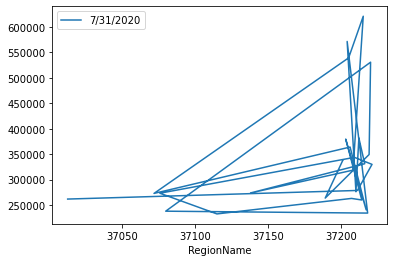

In [65]:
nash_property_trends_df.plot.line('RegionName', '7/31/2020')

In [39]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [40]:
nash_property_trends_df.describe()

,RegionID,SizeRank,RegionName,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,74222.269231,5409.961538,37180.730769,307839.115385,308752.153846,309359.846154,309994.692308,311103.615385,312751.423077,314117.923077,...,321582.423077,323357.423077,325202.884615,327611.230769,330225.076923,332663.115385,334812.115385,337268.307692,340037.423077,343149.192308
std,39.306547,4864.424837,58.584338,100138.472624,100217.669653,100189.006035,100272.306722,100585.548280,101210.935778,101736.578154,...,104332.602410,104901.615427,105492.166251,106338.823004,107239.939421,108067.858813,108839.250646,109797.906672,110964.725592,112133.479541
min,74101.000000,16.000000,37013.000000,209461.000000,210642.000000,210387.000000,209883.000000,210541.000000,211383.000000,212165.000000,...,219700.000000,221834.000000,223551.000000,225183.000000,227082.000000,228966.000000,230661.000000,232686.000000,234713.000000,237321.000000
25%,74229.750000,2017.750000,37192.000000,240451.500000,241570.500000,242456.000000,243112.250000,244081.750000,245217.500000,246143.250000,...,249843.250000,251202.500000,252983.000000,255132.500000,257200.000000,259409.500000,260866.750000,263289.250000,266167.750000,270247.000000
50%,74238.500000,3777.500000,37207.500000,272974.500000,273901.000000,274553.000000,275108.000000,276228.000000,277484.000000,278627.000000,...,286895.000000,287886.500000,289306.000000,291291.000000,293631.500000,295372.000000,297051.500000,298744.500000,300802.500000,302877.000000
75%,74245.750000,6789.250000,37214.750000,329328.750000,330344.250000,331044.000000,331327.750000,331734.500000,332635.750000,333398.500000,...,342622.250000,344078.000000,345915.750000,348317.000000,351504.250000,354414.750000,357215.750000,360387.750000,363641.250000,366627.500000
max,74252.000000,17834.000000,37221.000000,567338.000000,568663.000000,569781.000000,571333.000000,573626.000000,576893.000000,579553.000000,...,591613.000000,594751.000000,598317.000000,603077.000000,608063.000000,612453.000000,616357.000000,621032.000000,626461.000000,632981.000000


In [52]:
zillow_df = pd.read_csv('../data/zillow_zips.csv')
zillow_df.head()

,Column1,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,253850,255110,256685,258199,259627,260725,261865,262999,264712
1,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,268705,269829,271358,273335,275236,276925,278774,280774,283235
2,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,318986,320464,322454,324433,326460,328274,330013,331939,334253
3,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,329391,331443,334101,336977,339390,341524,343794,346644,349577
4,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,261847,263309,265424,267640,269802,271570,273363,275333,277893


In [53]:
zillow_trends = zillow_df[zillow_df['State'] == 'TN']
zillow_trends.head()

,Column1,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,253850,255110,256685,258199,259627,260725,261865,262999,264712
1,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,268705,269829,271358,273335,275236,276925,278774,280774,283235
2,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,318986,320464,322454,324433,326460,328274,330013,331939,334253
3,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,329391,331443,334101,336977,339390,341524,343794,346644,349577
4,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,261847,263309,265424,267640,269802,271570,273363,275333,277893


In [54]:
zillow_trends = zillow_df[zillow_df['CountyName'] == 'Davidson County']
zillow_trends.head()

,Column1,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,253850,255110,256685,258199,259627,260725,261865,262999,264712
1,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,268705,269829,271358,273335,275236,276925,278774,280774,283235
2,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,318986,320464,322454,324433,326460,328274,330013,331939,334253
3,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,329391,331443,334101,336977,339390,341524,343794,346644,349577
4,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,261847,263309,265424,267640,269802,271570,273363,275333,277893


In [55]:
zillow_trends.info

<bound method DataFrame.info of     Column1  SizeRank  RegionName RegionType StateName State            City  \
0     74101        16       37013        Zip        TN    TN       Nashville   
1     74242        24       37211        Zip        TN    TN       Nashville   
2     74252       988       37221        Zip        TN    TN       Nashville   
3     74240      1068       37209        Zip        TN    TN       Nashville   
4     74157      1171       37076        Zip        TN    TN       Nashville   
5     74178      1362       37115        Zip        TN    TN       Nashville   
6     74238      1951       37207        Zip        TN    TN       Nashville   
7     74245      2218       37214        Zip        TN    TN       Nashville   
8     74234      2471       37203        Zip        TN    TN       Nashville   
9     74248      2645       37217        Zip        TN    TN       Nashville   
10    74237      2712       37206        Zip        TN    TN       Nashville   
11    74

In [56]:
zillow_trends.pop

<bound method DataFrame.pop of     Column1  SizeRank  RegionName RegionType StateName State            City  \
0     74101        16       37013        Zip        TN    TN       Nashville   
1     74242        24       37211        Zip        TN    TN       Nashville   
2     74252       988       37221        Zip        TN    TN       Nashville   
3     74240      1068       37209        Zip        TN    TN       Nashville   
4     74157      1171       37076        Zip        TN    TN       Nashville   
5     74178      1362       37115        Zip        TN    TN       Nashville   
6     74238      1951       37207        Zip        TN    TN       Nashville   
7     74245      2218       37214        Zip        TN    TN       Nashville   
8     74234      2471       37203        Zip        TN    TN       Nashville   
9     74248      2645       37217        Zip        TN    TN       Nashville   
10    74237      2712       37206        Zip        TN    TN       Nashville   
11    741

In [57]:
zillow_trends = zillow_trends.loc[zillow_trends['RegionName'].isin(['37211', '37203', '37013','37076', '37205', '37214'])]
zillow_trends.head()

,Column1,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,253850,255110,256685,258199,259627,260725,261865,262999,264712
1,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,268705,269829,271358,273335,275236,276925,278774,280774,283235
4,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,261847,263309,265424,267640,269802,271570,273363,275333,277893
7,74245,2218,37214,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,249946,251103,252666,254539,256454,258234,260054,262247,264934
8,74234,2471,37203,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,367053,369080,372036,374885,376803,378098,379715,381909,384315


<AxesSubplot:xlabel='7/31/2020'>

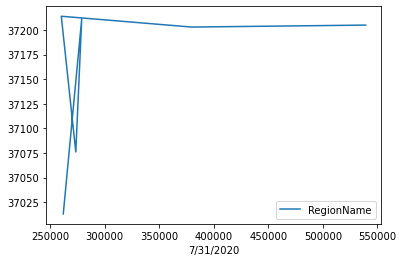

In [67]:
zillow_trends.plot.line('7/31/2020', 'RegionName')



In [70]:
zillow_trends.plot(figsize=(10,6), yticks=range(1/31/2020 : 9/30/2020).legend(title='Avg House Per Zip', bbox_to_anchor=(1, 1))

SyntaxError: invalid syntax (<ipython-input-70-5b651da6b63e>, line 1)

In [69]:
zillow_trends.describe()

,Column1,SizeRank,RegionName,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,74202.500000,1581.166667,37153.666667,319847.000000,321560.166667,323856.166667,326363.333333,328502.000000,330296.000000,332174.666667,334457.000000,337279.166667
std,59.755334,1432.723200,86.965894,106384.167963,107196.654809,108182.851610,109286.526003,109915.306514,110473.195835,111001.570159,111928.860051,112969.246249
min,74101.000000,16.000000,37013.000000,249946.000000,251103.000000,252666.000000,254539.000000,256454.000000,258234.000000,260054.000000,262247.000000,264712.000000
25%,74176.250000,310.750000,37107.750000,255849.250000,257159.750000,258869.750000,260559.250000,262170.750000,263436.250000,264739.500000,266082.500000,268173.750000
50%,74235.000000,1694.500000,37204.000000,265276.000000,266569.000000,268391.000000,270487.500000,272519.000000,274247.500000,276068.500000,278053.500000,280564.000000
75%,74240.500000,2407.750000,37209.500000,342466.000000,344267.250000,346866.500000,349497.500000,351411.250000,352804.750000,354479.750000,356625.250000,359045.000000
max,74245.000000,3587.000000,37214.000000,517681.000000,520930.000000,524968.000000,529582.000000,533090.000000,536224.000000,539277.000000,543480.000000,548586.000000
